In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Function to read and preprocess data
def read_and_preprocess(file_name):
    # Read the file
    df = pd.read_csv(file_name, sep=" ", header=None, names=["species", "assembly", "count"])
    # Remove the assembly distinction, focus on species only
    df['species'] = df['species'].str.extract(r'([a-zA-Z]+\d*)')[0]
    df = df[df['species'] != 'mPleAur1']
    # Sum the counts for each species
    df = df.groupby('species').agg({'count': 'sum'}).reset_index()
    return df

def read_metadata(file_name):
    metadata = pd.read_csv(file_name, sep="\t")
    metadata['species'] = metadata['IndividualID'].str.extract(r'([a-zA-Z]+\d*)')[0]  # Normalize the species ID
    return metadata[['species', 'CommonName']]
    
# Read the data files
df_v = read_and_preprocess('../meta/VgeneCount.txt')
df_d = read_and_preprocess('../meta/DgeneCount.txt')
df_j = read_and_preprocess('../meta/JgeneCount.txt')



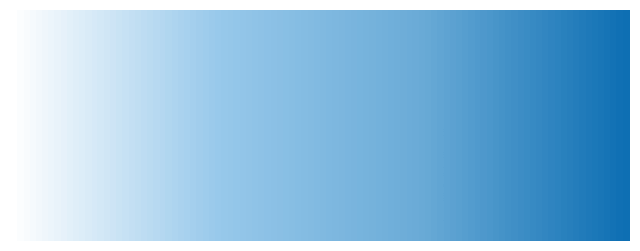

In [3]:
# Define the colors for the colormap
colors = [(1,1,1), "#98c9eb", "#6AABD7", "#0e6fb3"]  # white to light red to red
n_bins = 100  # Number of bins in the colormap
cmap_name = 'custom_red'

# Create the color map
cm2 = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Test the colormap
plt.figure(figsize=(8, 3))
plt.imshow(np.linspace(0, 100, 256).reshape(1, -1), cmap=cm2, aspect='auto')
plt.axis('off')
plt.show()

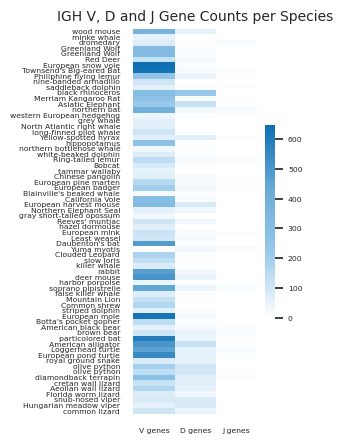

In [31]:
metadata = pd.read_csv("../species_metainfo.csv", sep=",", names=["species", "LatinName", "CommonName", "Source","SourceLink","Haplotype Resolved"])

# Merge the gene dataframes
df = df_v.merge(df_d, on='species', suffixes=('_V', '_D'))
df = df.merge(df_j, on='species')
df.rename(columns={'count': 'count_J'}, inplace=True)

# Merge with metadata to include common names
df = df.merge(metadata, on='species')
df.set_index('CommonName', inplace=True)  # Set the common names as the index for the heatmap
sns.set(font_scale=0.5)
df = df.drop(columns=['species',"LatinName", "Source","SourceLink","Haplotype Resolved"])
df.columns = ['V genes', 'D genes', 'J genes']

# Plot the heatmap
plt.figure(figsize=(2, 5))
sns.heatmap(df, annot=False, cmap=cm2, fmt="d", yticklabels=True, cbar_kws={"shrink": 0.5})
plt.title('IGH V, D and J Gene Counts per Species', fontsize=10)
plt.ylabel('')
plt.savefig('../IGH.vdj.png', format="png", dpi=300, bbox_inches='tight')
plt.show()